# Instituto Tecnológico de Monterrey
# Ciencia y analítica de datos
# A01793599 Gustavo René Ramos Ojeda

# Módulo 4 - Model development

In [22]:
# A01793599 - Initial part of the lab

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# A01793599 - Initining dataframe from local file
filename="automobileEDA.csv"
df = pd.read_csv(filename)
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Question 1a - Crear objeto de Regresión lineal lm1

In [23]:
# A01793599 - Creating LR object
lm1 = LinearRegression()

Question 1b - Entrena el modelo con "engine-size" como X y "price" como dependiente

In [24]:
# A01793599 - Setting variables
X = df[['engine-size']]
Y = df['price']

# A01793599 - Fitting in model
lm1.fit(X,Y)

LinearRegression()

Question 1c - Encuentra Slope y Coef

In [25]:
# A01793599 - Printing slope & coef

print( "Slope for lm1: " + str(lm1.intercept_) )

print( "Coef for lm1: " + str(lm1.coef_))

Slope for lm1: -7963.338906281024
Coef for lm1: [166.86001569]


Question 1d - Cuál es la ecuación de la línea de predicción??

In [26]:
# A01793599 - Setting equation

newPrice = -7963.34 + 166.86 * df["engine-size"]

Question 2a - Crear un modelo de Regresión Múltiple lm2 con "Price" como variable dependiente y con "normalized-losses" y "highway-mpg" como variables independientes

In [27]:
lm2 = LinearRegression()

# A01793599 - Setting variables
X2 = df[["normalized-losses", "highway-mpg"]]
Y2 = df["price"]

# A01793599 - Fitting in model
lm2.fit(X,Y)

LinearRegression()

Question 2b - Encuentra Coef para lm2

In [28]:
# A01793599 - Printing coef

print( "Coef for lm2: " + str(lm2.coef_))

Coef for lm2: [166.86001569]


Setting values for regression plot

(0.0, 47414.1)

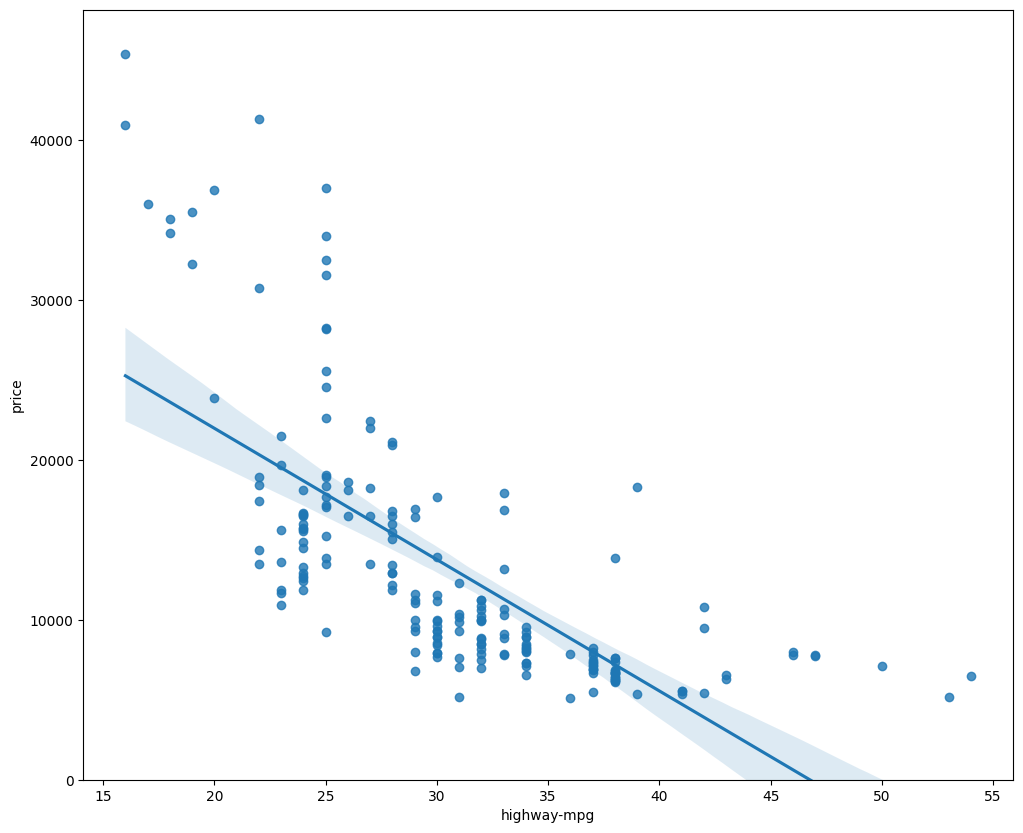

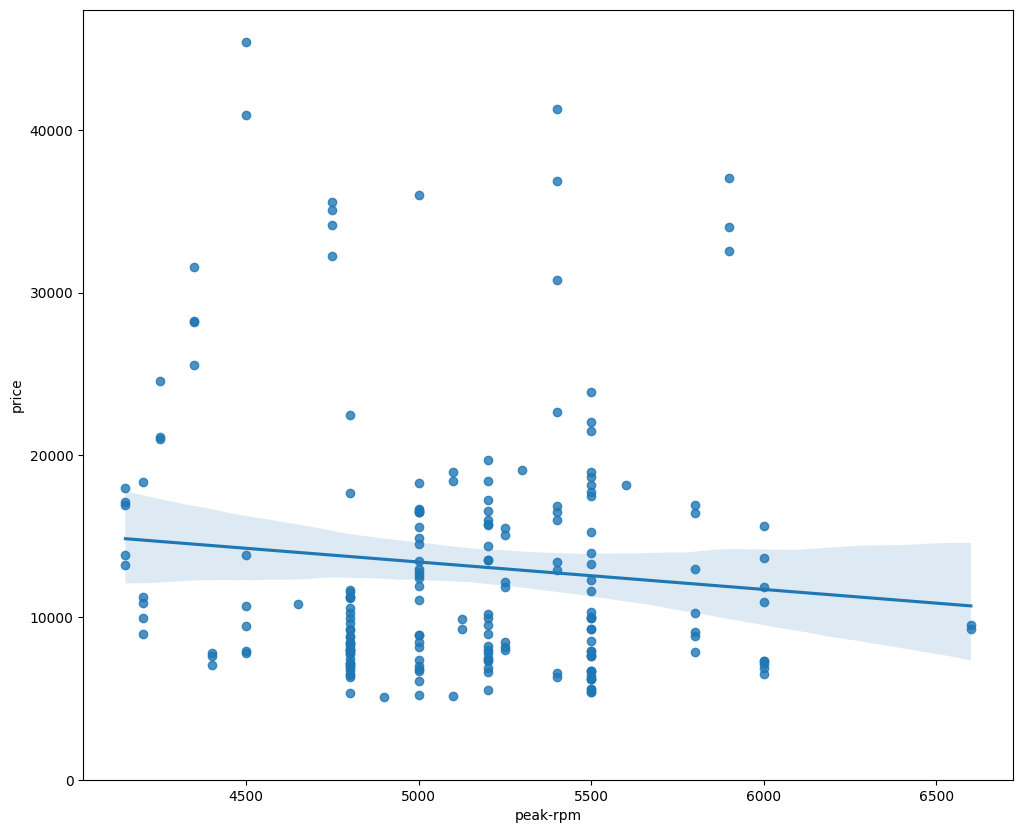

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Question 3 - Encontrando la correlación entre las variables expuestas en el Plot de regresión

In [30]:
# A01793599 - Finding correlation
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Con lo anterior se puede concluir que la variable de highway-mpb tiene una mejor y más fuerte correlación con la variable "price" mientras que la variable "peak-rpm" realmente no representa una correlación significativa como se puede observar en la gráfica de regresión.

In [31]:
# A01793599 - Defining function for printing Polynomial Plot
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

    

Question 4 - Crea un modelo de orden polinomial 11 con las variables X y Y

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


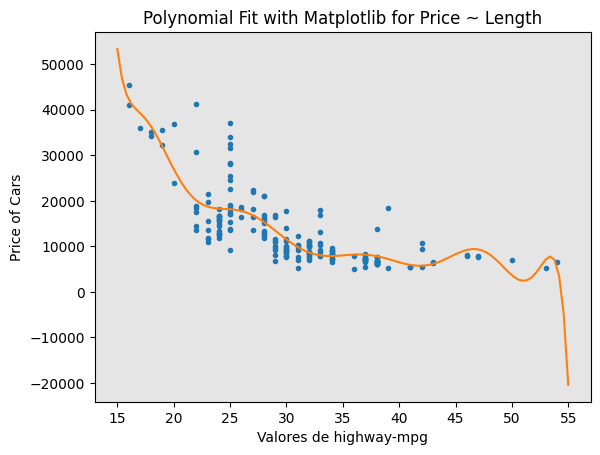

In [32]:
x = df['highway-mpg']
y = df['price']

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, "Valores de highway-mpg")

Question 5 - Implementa un pipeline que estandarize los datos, y luego genera una predicción utilizando una regresión lineal utilizando Z e y

In [33]:
# A01793599 - Retrieving Z from model definition
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Input=[('scale',StandardScaler()),('model',LinearRegression())]

# A01793599 - Creating pipeline
pipe=Pipeline(Input)

# A01793599 - Fitting Z with y
pipe.fit(Z,y)

# A01793599 - Predicting fitted Z 
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])